# Business Problem
As a Data Mining/Analytic Consultant, you are asked develop a **Customer Segmentation** in such a way that it will be possible for the Marketing Department to **better understand all the different Customers’ Profiles**.
You are expected to **define, describe and explain the clusters you chose**. Invest time in reasoning how you want to do your clustering, possible approaches, and advantages or disadvantages of different decisions.
Simultaneous, you should **express the marketing approach you recommend for each cluster**. 
A credit card company makes money, mainly, if/via:
* Customers don't pay their balance in full every month to avoid interest charges;
* Transaction fees (e.g., cash advance fees);
* Interchange - Every time you use a credit card, the merchant pays a processing fee equal to a percentage of the transaction. The portion of that fee sent to the issuer via the payment network is called “interchange,” and is usually about 1% to 3% of the transaction. These fees are set by payment networks and vary based on the volume and value of transactions.

# Business Understanding

"This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :

**CUSTID** : Identification of Credit Card holder

**BALANCE** : Amount left to make purchases.

**BALANCEFREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES** : Amount of purchases made from account

**ONEOFFPURCHASES** : Maximum purchase amount done in one-go

**INSTALLMENTSPURCHASES** : Amount of purchase done in installment

**CASHADVANCE** : Cash in advance given by the user. A cash advance on your credit card is an amount of cash borrowed against your credit limit. It's like withdrawing money from the ATM with your debit card, except the cash comes from your credit limit rather than your bank account balance. That means you have to pay it back with interest.

**PURCHASESFREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not 
frequently purchased)

**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid

**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"

**PURCHASESTRX** : Number of purchase transactions made

**CREDITLIMIT** : Maximum amount of credit a financial institution extends to a client

**PAYMENTS** : Amount of Payment done by user

**MINIMUM_PAYMENTS** : Minimum amount of payments made by user. It's the minimum amount of money you need to pay towards your credit card balance each month to avoid a late charge or fee. After 30 days without paying at least the minimum, your account can be reported delinquent and your credit score could also take a hit.

**PRCFULLPAYMENT** : Percent of full payment paid by user?

**TENURE** : Months to pay the debt"

Dataset retirado do Kaggle: https://www.kaggle.com/arjunbhasin2013/ccdata

**Insights**
* Apesar de existirem várias variáveis baseadas na Frequência, não sabemos definir ao certo o que torna alguém Frequente e alguém não-frequente. Precisaríamos de pedir informação sobre o que define alguém considerado frequente de alguém não-frequente.
* Remover as variáveis de frequência é possível? A verdade é que 1 e 0 não diz muito a um modelo.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import shutil
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import requests
import sklearn as sc
from zipfile import ZipFile
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import collections
from scipy import stats
import matplotlib.ticker as mtick
import category_encoders as ce
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('CC GENERAL.csv', encoding='utf-8')

#(file, delimiter = ";")

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Analisar primeiras 5 linhas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# Passar a coluna CUST_ID para o índex da tabela
df.set_index("CUST_ID", inplace = True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Data Understanding

In [6]:
# Análise da tabela
n_rows, n_columns = df.shape
print("O dataset tem {} Linhas e {} Colunas.".format(n_rows, n_columns))

O dataset tem 8950 Linhas e 17 Colunas.


In [7]:
# Descrição dos dados
df.dtypes

BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

**Insights**
* Não há variáveis categóricas.

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Insights**
* Apenas **_Balance Frequency_ , _Purchases_Frequency_ , _PRC_Full_Payment_ e _Tenure_** têm um valor na média e mediana semelhantes. Será preciso fazer alguma transformação para ter uma distribuição mais normal.
* As variáveis de frequêcia já devem estar normalizadas.
* Standard deviation grande em várias variáveis.
* Poucas variáveis com missing values.
* As variáveis relacionadas com **_PURCHASES_** têm um máximo superior ao **_BALANCE_**. Tem sentido? O que significa?

In [9]:
# Análise de todos os valores únicos na base de dados para tentar encontrar valores estranhos
for col in df:
    print(df[col].unique())

[  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]
[0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]
[  95.4     0.    773.17 ...  291.12  144.4  1093.25]
[   0.    773.17 1499.   ...  734.4  1012.73 1093.25]
[  95.4     0.   1333.28 ...  113.28  291.12  144.4 ]
[   0.       6442.945483  205.788017 ... 8555.409326   36.558778
  127.040008]
[0.166667 0.       1.       0.083333 0.666667 0.333333 0.25     0.75
 0.5      0.416667 0.916667 0.583333 0.375    0.625    0.272727 0.833333
 0.909091 0.111111 0.142857 0.090909 0.363636 0.1      0.875    0.125
 0.818182 0.636364 0.2      0.8      0.3      0.9      0.285714 0.727273
 0.181818 

**Insights**
* Não há valores estranhos. Apenas missing values.

In [10]:
# Número de Missing Values por Variável
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
# Percentagem dos missing values por variável
df.isna().sum()/df.shape[0]*100

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

**Insights**
* Poucas variáveis com missing values. As que têm, têm poucos valores em falta.

### Análise Visual

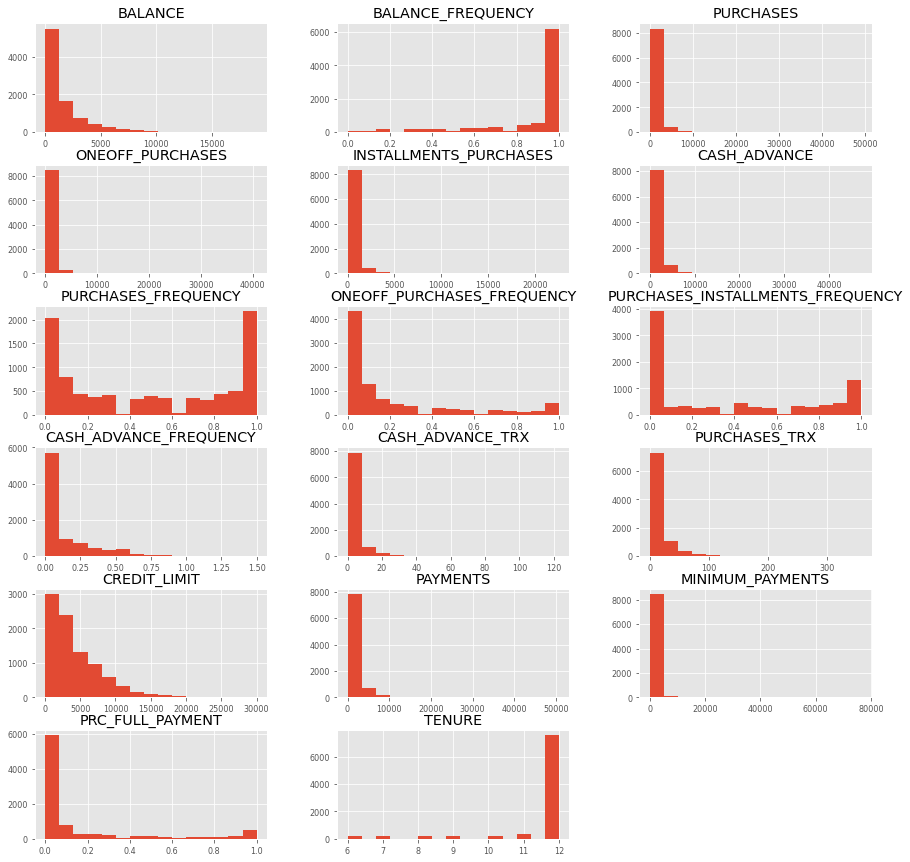

In [12]:
# Do histograms on all numeric variables
numerical=df.select_dtypes(include=[np.number]).columns.tolist()
df[numerical].hist(bins=15, figsize=(15, 15), layout=(6, 3), xlabelsize=8, ylabelsize=8);

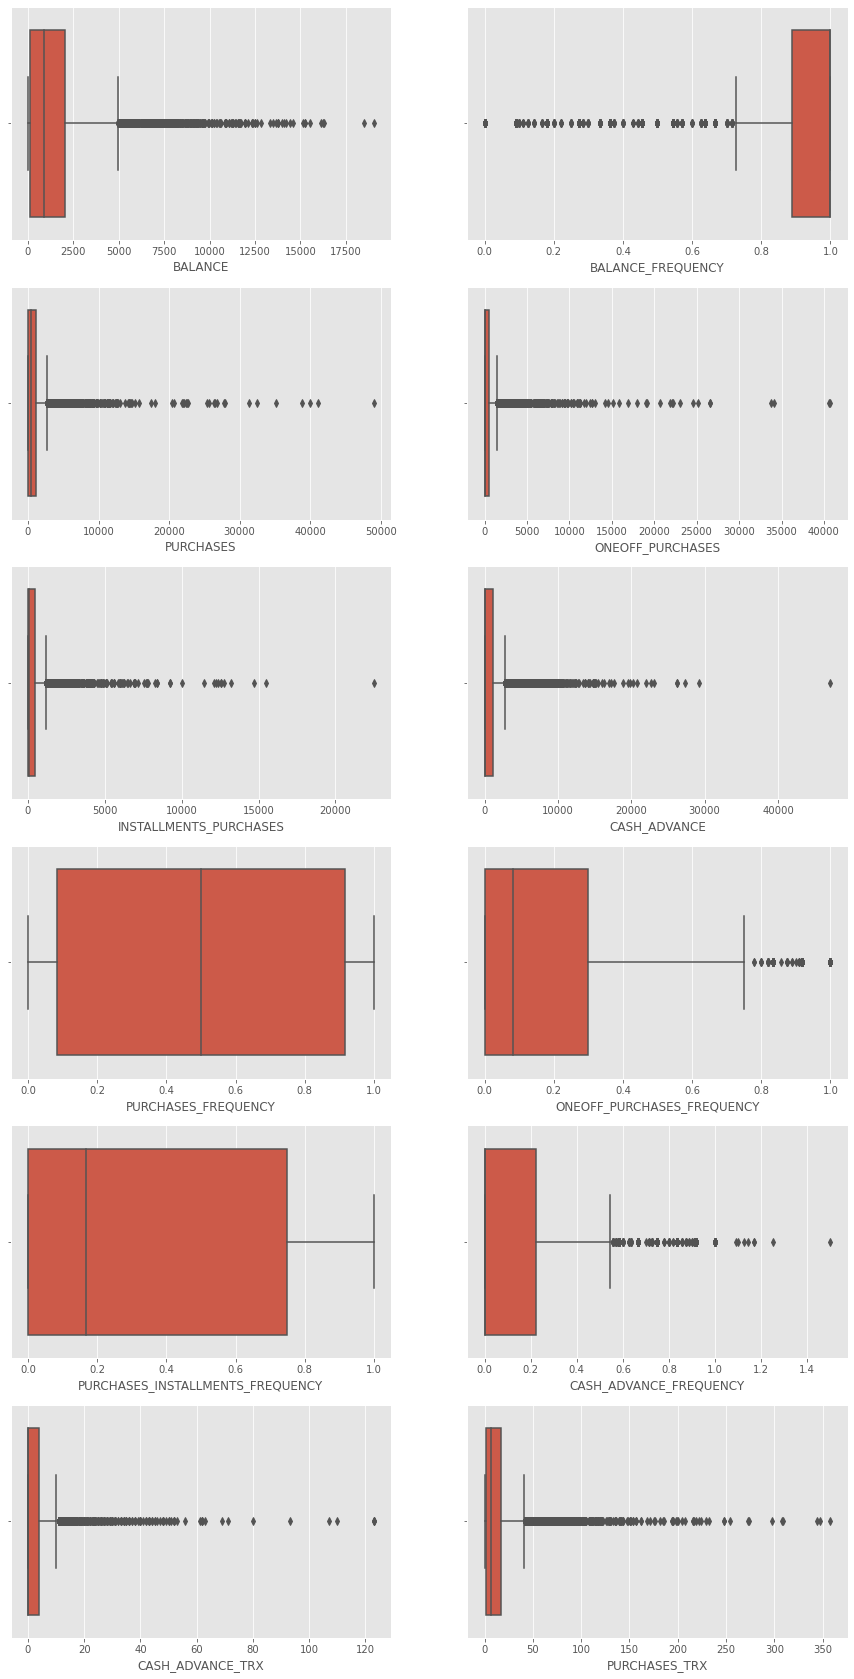

In [13]:
# Do boxplots on all numeric variables
fig, ax = plt.subplots(6, 2, figsize=(15, 30))
for var, subplot in zip(df[numerical], ax.flatten()):
    sns.boxplot(df[var], ax=subplot)

**Insights**
* Apenas 2 variáveis não têm o que podem, à partida, ser considerados outliers.
* Quase não há distribuições normais.
* O que significam os valores de _Tenure_

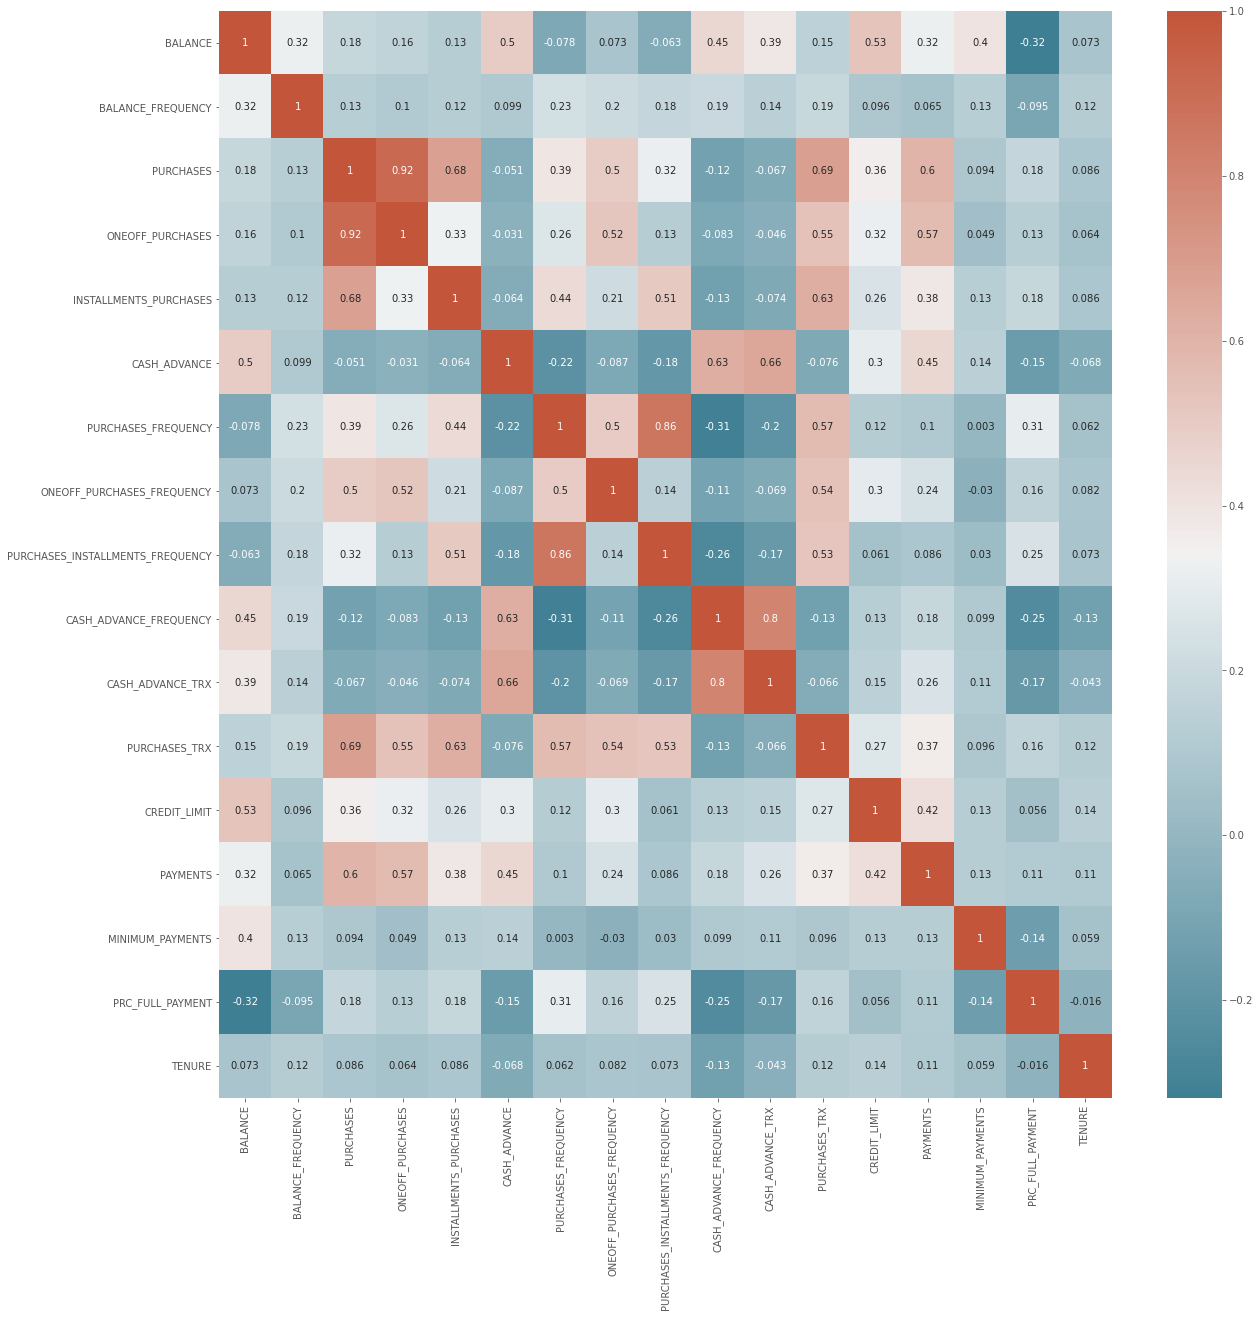

In [14]:
# Análise da correlação entre variáveis

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

**Insights**
* Alta correlação entre _Purchases_ e _Oneoff_Purchases_ e entre _Purchases_Frequency_ e _Purchases_Installments_Frequency_. Será preciso remover 2 destas variáveis para evitar multicolinearidade.

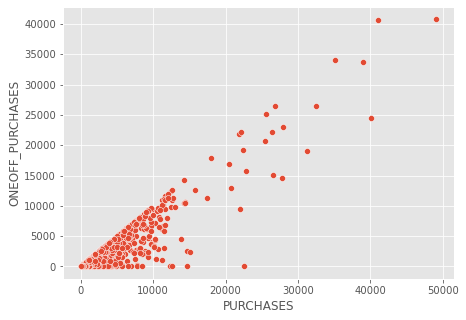

In [15]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "PURCHASES", y = "ONEOFF_PURCHASES")
plt.show()

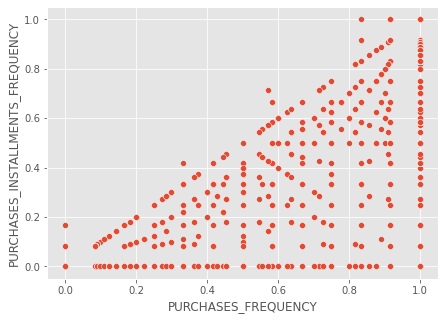

In [16]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "PURCHASES_FREQUENCY", y = "PURCHASES_INSTALLMENTS_FREQUENCY")
plt.show()

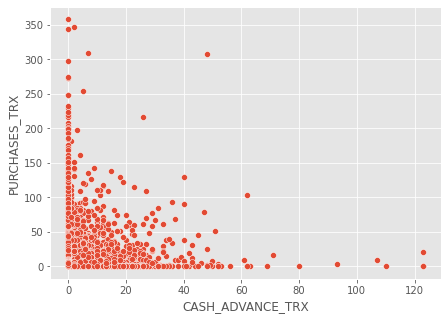

In [17]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "CASH_ADVANCE_TRX", y = "PURCHASES_TRX")
plt.show()

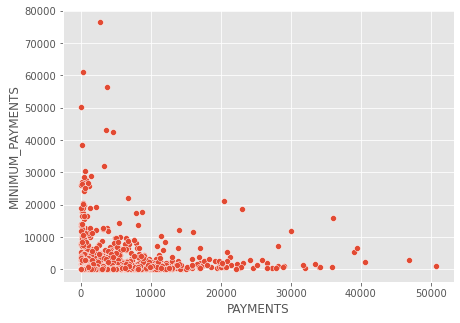

In [18]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "PAYMENTS", y = "MINIMUM_PAYMENTS")
plt.show()

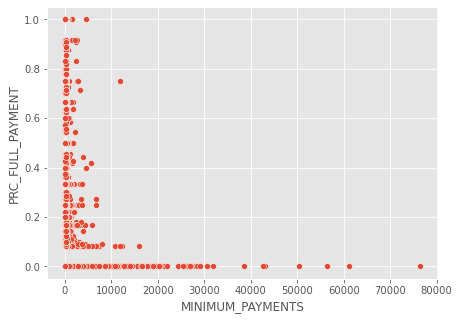

In [19]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = "MINIMUM_PAYMENTS", y = "PRC_FULL_PAYMENT")
plt.show()

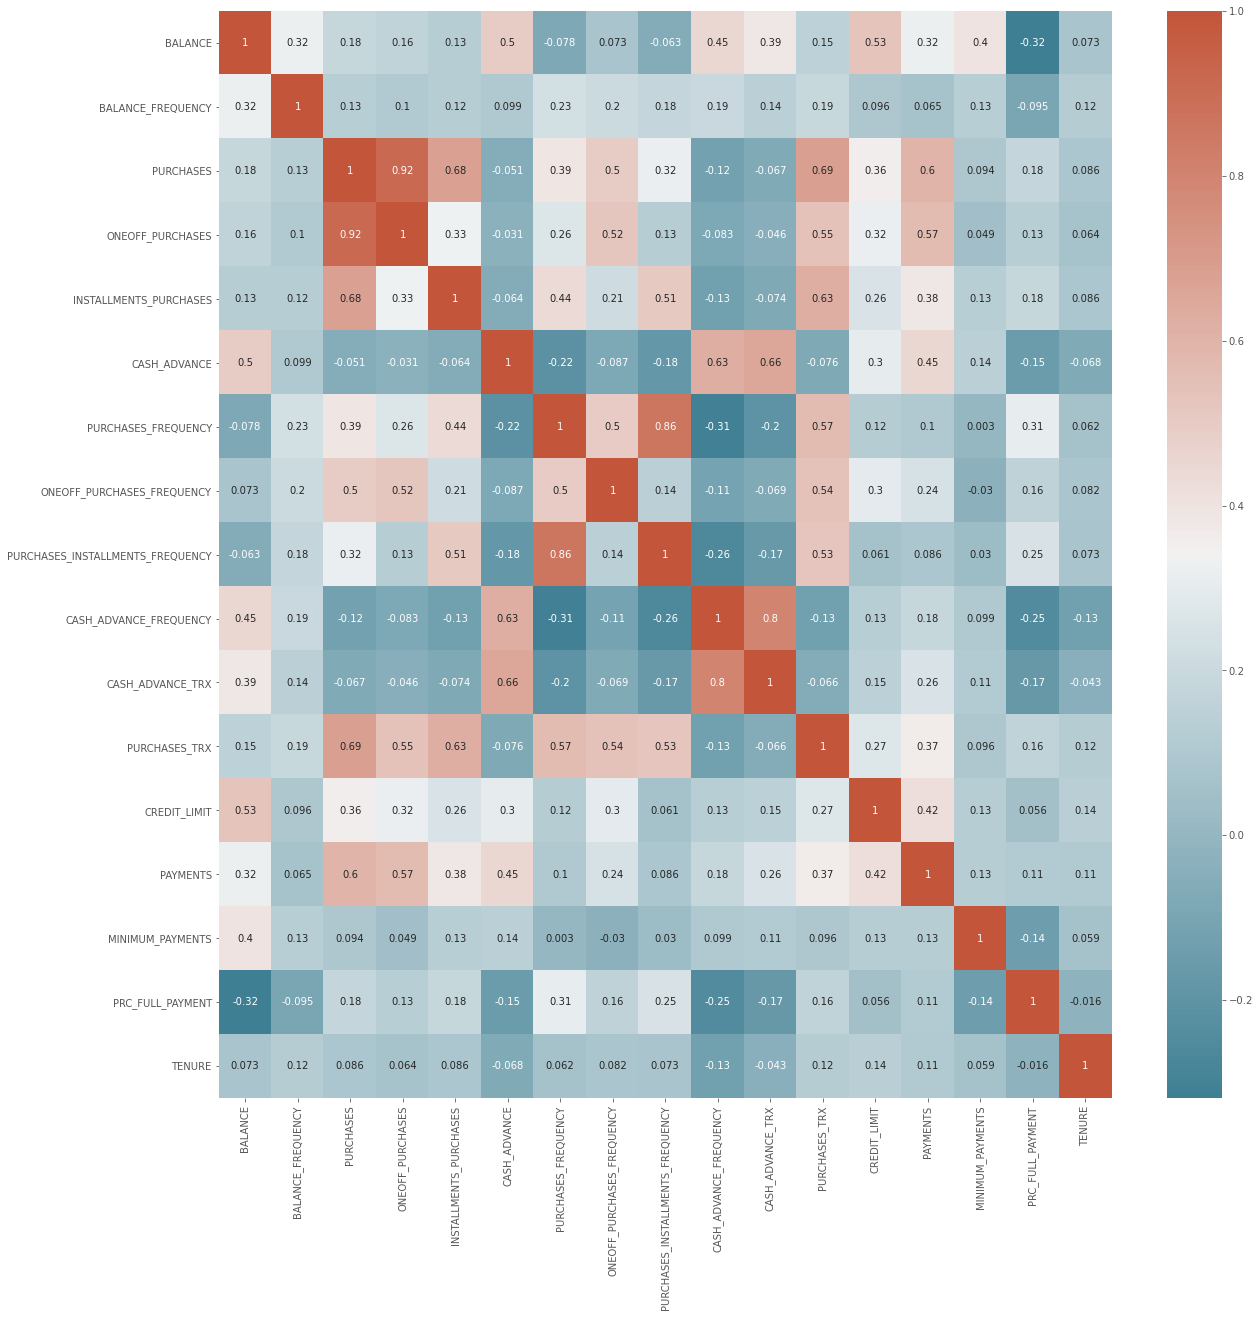

In [20]:
# Análise da correlação entre variáveis

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

# Data Preparation
* Missing Values
* Feature Engineering
* Outliers
* Drop Correlated Features
* Normalization (PCA & Data Reduction?)

In [21]:
# Cópia do dataframe pré-tratamento
X = df.copy(deep=True)

## Missing Values

**_CREDIT_LIMIT_** tem 0.01% de dados em falta e **_MINIMUM_PAYMENTS_** tem 3,5% de dados em falta. Removem-se os valores em falta.

In [22]:
# Remoção todos os missing values
X.dropna(inplace=True)

In [23]:
# Confirmação de que já não há missing values
X.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [24]:
n_rows, n_columns = X.shape
print("O dataset tem {} Linhas e {} Colunas.".format(n_rows, n_columns))

O dataset tem 8636 Linhas e 17 Colunas.


In [25]:
# Preenchimento dos campos NaN com 0. Estes existem porque um dos valores na equação era 0. O resultado tem sentido.
X.fillna(0, inplace = True)
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


## Feature Engineering
* FEE APPLIED -> Quando a pessoa não paga o minimum payment

In [26]:
X['Fee_Applied'] = X['MINIMUM_PAYMENTS'] - X['PAYMENTS']
X.loc[X['Fee_Applied'] > 0, 'Fee_Applied?'] = 1
X.drop(['Fee_Applied'], axis=1, inplace = True)

* Frequency -> Frequencia Mensal de Transações = PURCHASES_TRX + CASH_ADVANCE_TRX a dividir pelos 6 meses

In [27]:
X['FREQ'] = (X['PURCHASES_TRX'] + X['CASH_ADVANCE_TRX']) / 6

* Monetary -> INSTALLMENTSPURCHASES + CASHADVANCE

In [28]:
X['MON'] = X['INSTALLMENTS_PURCHASES'] + X['CASH_ADVANCE']

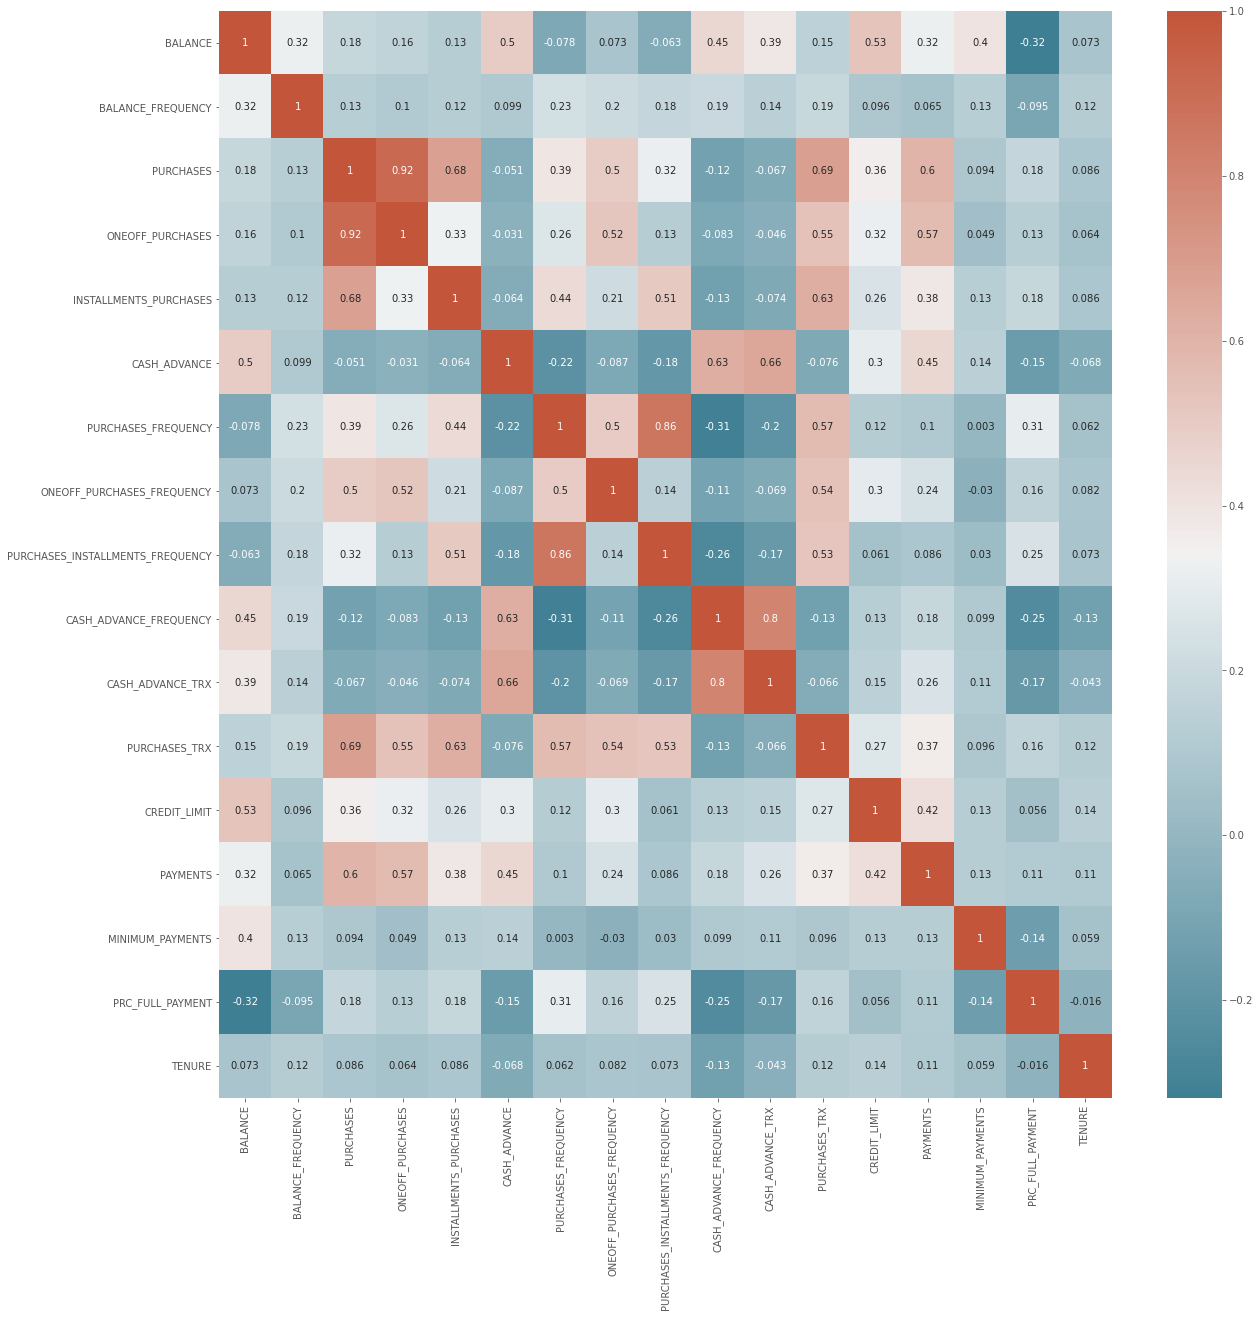

In [29]:
# Análise da correlação entre variáveis

cmap = sns.diverging_palette(220, 20, as_cmap=True)

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True, cmap = cmap)
plt.show()

In [30]:
dataCorr = X.corr()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

correlation_mat = dataCorr

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.75 ]

strong_pairs2 = sorted_pairs[abs(sorted_pairs) < -0.75 ]

print(strong_pairs, strong_pairs2)

CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQUENCY    0.799593
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY       0.862338
MON                               CASH_ADVANCE              0.913924
ONEOFF_PURCHASES                  PURCHASES                 0.916780
FREQ                              PURCHASES_TRX             0.963163
dtype: float64 Series([], dtype: float64)


## Outliers

* "If skewness is less than -1 or greater than 1, the distribution is highly skewed.
If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
If skewness is between -0.5 and 0.5, the distribution is approximately symmetric." - https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241


* Muitas variáveis neste dataset têm zeros, pelo que não dará para transformar os dados através de transformações log ou boxcox. Ainda assim, é possível diminuir a skewness dos dados através da Square Root Transformation ou Log1p. Tendo em conta a informação acima, o objetivo passa por ter valores de skewness entre -0.5 e 0.5. Nas que for possível a transformação log ou boxcox fá-las-emos.

Apoio: 
* https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45
* https://machinelearningmastery.com/power-transform-time-series-forecast-data-python/
* https://stackoverflow.com/questions/65982059/is-log1p-the-correct-way-of-doing-log-scale-transformation-of-charts
* https://discuss.analyticsvidhya.com/t/methods-to-deal-with-zero-values-while-performing-log-transformation-of-variable/2431/2

In [31]:
# Summary statistics for all variables
summary=X.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.138560
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.570000
ONEOFF_PURCHASES,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.250000
INSTALLMENTS_PURCHASES,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.000000
CASH_ADVANCE,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.211760
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.500000


In [32]:
skew_cols = ["BALANCE", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "CASH_ADVANCE", 
             "ONEOFF_PURCHASES_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX", 
             "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT"]

#### Copia DF pré-log10

In [33]:
XPrelog = X.copy()

#### LOG10 Transformation

* como tem valores zero apliquei +1

In [34]:
X[skew_cols]=np.log10(X[skew_cols]+1)

In [35]:
# Summary statistics for all variables
summary=X.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,mean,std,min,25%,50%,75%,max
BALANCE,8636.0,2.721175,0.823414,0.000000,2.173463,2.962774,3.323499,4.279761
BALANCE_FREQUENCY,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,8636.0,2.140596,1.269364,0.000000,1.647065,2.575655,3.059556,4.690556
ONEOFF_PURCHASES,8636.0,1.406897,1.412595,0.000000,0.000000,1.662711,2.778224,4.610258
INSTALLMENTS_PURCHASES,8636.0,1.471339,1.342408,0.000000,0.000000,1.981297,2.685874,4.352202
CASH_ADVANCE,8636.0,1.454511,1.550915,0.000000,0.000000,0.000000,3.054378,4.673373
PURCHASES_FREQUENCY,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8636.0,0.070061,0.094630,0.000000,0.000000,0.034762,0.124939,0.301030
PURCHASES_INSTALLMENTS_FREQUENCY,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8636.0,0.050154,0.068593,0.000000,0.000000,0.000000,0.096910,0.397940


Skewness original:  2.393386042571806 Skewness Log10:  -0.7760035358816254
Skewness original:  8.144269064554651 Skewness Log10:  -0.7776879605982571
Skewness original:  10.045082884700278 Skewness Log10:  0.16841964410507437
Skewness original:  7.299119908745641 Skewness Log10:  -0.04215742921362819
Skewness original:  5.1666090740747235 Skewness Log10:  0.24816946406309018
Skewness original:  1.5356127835248519 Skewness Log10:  1.2607222558717441
Skewness original:  1.828686266477852 Skewness Log10:  1.425891693966091
Skewness original:  5.721298203192298 Skewness Log10:  0.9206189513008
Skewness original:  4.630655265932403 Skewness Log10:  0.009795218627027725
Skewness original:  1.5224640052886198 Skewness Log10:  -0.10640195517485905
Skewness original:  5.907619794397562 Skewness Log10:  -0.050354180203562866
Skewness original:  13.622796994677454 Skewness Log10:  0.25152378285722066
Skewness original:  1.942819940971858 Skewness Log10:  1.690590062014761


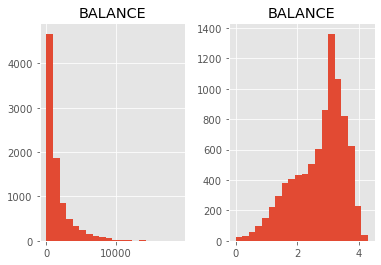

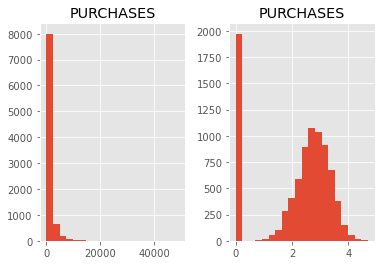

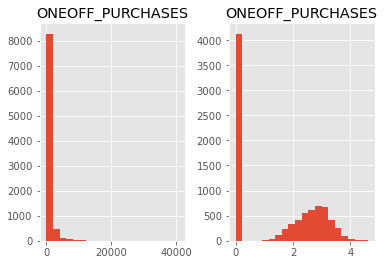

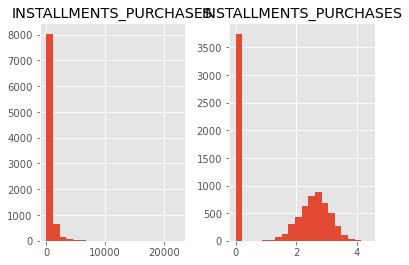

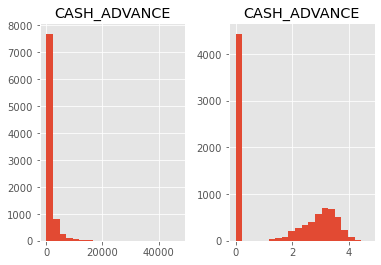

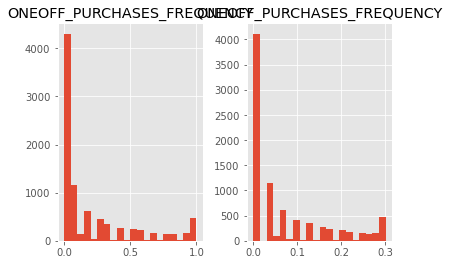

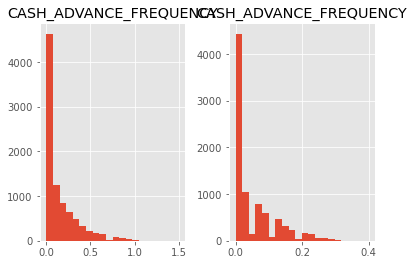

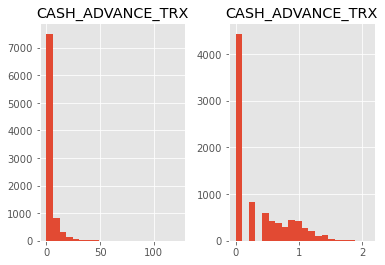

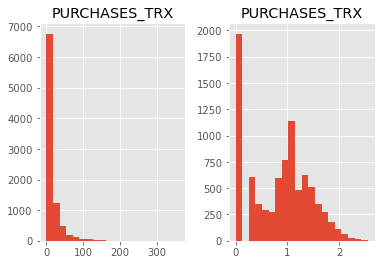

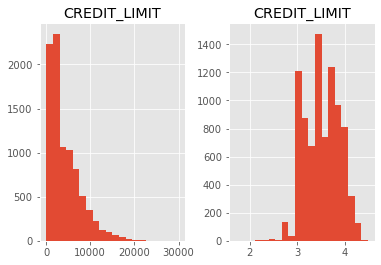

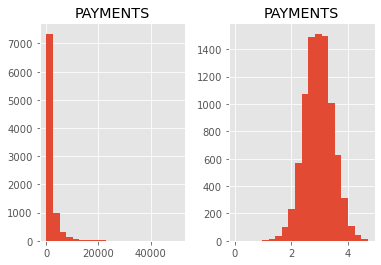

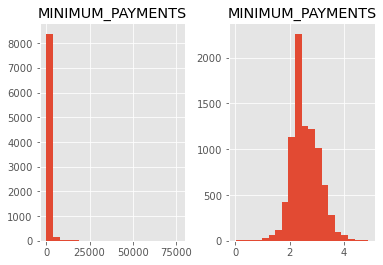

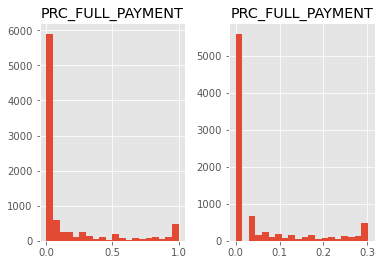

In [36]:
for i in skew_cols:
    print("Skewness original: ",df[i].skew(), "Skewness Log10: ",X[i].skew())
    fig, axes = plt.subplots(1, 2)
    df.hist(i, bins=20, ax=axes[0])
    X.hist(i, bins=20, ax=axes[1])

##### Normalization

In [37]:
# Get a copy of the dataframe before normalization
X_beforeNorm = X.copy(deep=True)

#DATAFRAME COPY PRE-LOG10

XPrelog

# Normalize all columns
cols = list(X.columns) # save the name of the columns
X_array = X.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_array)
X = pd.DataFrame(X_scaled, columns=cols)

### Modeling

##### Drop Columns not to be used

* Correlations

In [38]:
dataCorr = X.corr()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))

correlation_mat = dataCorr

corr_pairs = correlation_mat.unstack()

sorted_pairs = corr_pairs.sort_values(kind="quicksort")

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.75 ]

strong_pairs2 = sorted_pairs[abs(sorted_pairs) < -0.75 ]

print(strong_pairs, strong_pairs2)

PURCHASES_TRX                     PURCHASES_INSTALLMENTS_FREQUENCY    0.758621
                                  INSTALLMENTS_PURCHASES              0.783017
PURCHASES_FREQUENCY               PURCHASES                           0.785913
                                  INSTALLMENTS_PURCHASES              0.796420
ONEOFF_PURCHASES_FREQUENCY        ONEOFF_PURCHASES                    0.815893
CASH_ADVANCE_FREQUENCY            CASH_ADVANCE                        0.816435
MINIMUM_PAYMENTS                  BALANCE                             0.816587
PURCHASES_INSTALLMENTS_FREQUENCY  PURCHASES_FREQUENCY                 0.862338
                                  INSTALLMENTS_PURCHASES              0.879631
PURCHASES_TRX                     PURCHASES                           0.891518
CASH_ADVANCE_TRX                  CASH_ADVANCE                        0.899377
PURCHASES_TRX                     PURCHASES_FREQUENCY                 0.908857
CASH_ADVANCE_TRX                  CASH_ADVANCE_FREQU

* O que fazemos em relação à correlação de variáveis depois da log transformation?

In [39]:
dropped = ['BALANCE_FREQUENCY', 'PURCHASES_TRX','ONEOFF_PURCHASES', 'CASH_ADVANCE_FREQUENCY', 'Fee_Applied?', 
           'PURCHASES_FREQUENCY', 'BALANCE', 'CASH_ADVANCE', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX']

In [40]:
X.drop(dropped, axis = 1, inplace = True)

#### WITH PCA

#### Analyze Principal Components

(8636, 2)


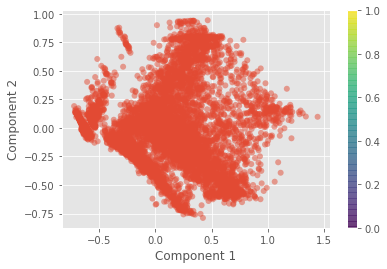

In [41]:
# Let'start to visualizar with only two components
pca2 = PCA(n_components = 2)
pca2.fit(X)
X_pca2 = pca2.transform(X) # Apply the dimension reduction to the dataset
print(X_pca2.shape)

# Plot a scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

In [42]:
# Fit the PCA algorithm to data 
pca = PCA().fit(X)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pca.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pca.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.418592,0.418592
1,2,0.199580,0.618172
2,3,0.159674,0.777846
3,4,0.104427,0.882273
4,5,0.045693,0.927966
5,6,0.032661,0.960627
6,7,0.019169,0.979796
7,8,0.011768,0.991564
8,9,0.005858,0.997422
9,10,0.002578,1.000000


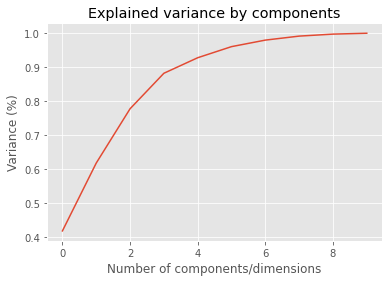

In [43]:
# Plot the cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance (%)')
plt.title('Explained variance by components')
plt.show()

### Modeling - K-Means

In [44]:
# Apply the dimension reduction to the dataset (for 8 components)
pca_reduced = PCA(n_components = 5)
pca_reduced.fit(X)
X_pca_reduced = pca_reduced.transform(X) 
print(X_pca_reduced.shape)

(8636, 5)


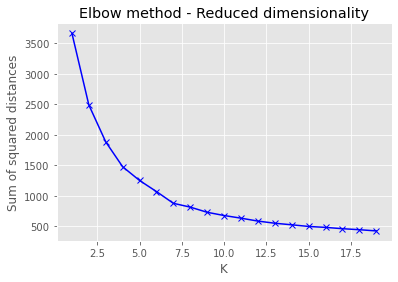

In [45]:
# Select K based on the sum of squared distances
ssd = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(X_pca_reduced)
    ssd.append(km.inertia_)
    
# Plot results
plt.plot(K, ssd, 'bx-')
plt.xlabel('K')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method - Reduced dimensionality')
plt.show()

In [46]:
# Apply the K-Means for K=4
K=4
kmeans = KMeans(n_clusters=K, random_state=123)
kmeans.fit(X_pca_reduced)
y_kmeans = kmeans.predict(X_pca_reduced)

In [47]:
# Count observations per cluster
X_beforeNorm.groupby(y_kmeans).size()

0    2660
1    3115
2    1285
3    1576
dtype: int64

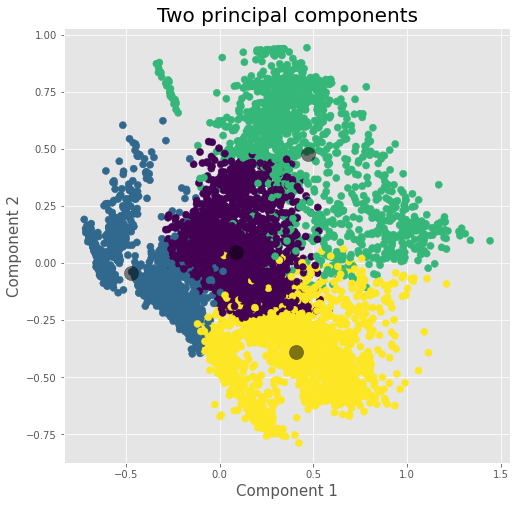

In [48]:
# Plot results two principal components
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Component 1', fontsize = 15)
ax.set_ylabel('Component 2', fontsize = 15)
ax.set_title('Two principal components', fontsize = 20)
ax.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [49]:
# Create a dataframe with the weights per component
wheightsDF = pd.DataFrame(pca.components_,columns=X.columns)
wheightsDF

,PURCHASES,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,FREQ,MON
0,0.553988,0.547874,0.491148,0.076745,0.082408,-0.023825,0.353796,0.067292,0.093572,0.000867
1,-0.126109,0.233442,-0.593552,-0.097529,-0.072676,-0.137274,0.725777,-0.116604,-0.055863,-0.013798
2,-0.173084,-0.627169,0.497940,0.040040,0.038216,-0.083945,0.552803,-0.112657,-0.013624,-0.013317
3,0.110415,0.068503,0.074678,-0.134500,-0.137657,-0.079145,-0.142892,-0.955883,-0.007614,-0.006870
4,-0.384317,0.208813,0.011974,0.604314,0.441162,0.364534,0.051298,-0.217622,0.159181,0.201296
5,0.689586,-0.430729,-0.372668,0.378713,0.165857,0.118341,0.026756,-0.071020,-0.081725,0.051835
6,-0.092333,0.076332,0.035154,0.652755,-0.399436,-0.605544,-0.085261,0.027772,-0.119258,-0.099136
7,-0.000939,0.012042,0.048599,0.161170,-0.711138,0.662959,0.106643,0.014721,-0.070023,-0.098958
8,0.055190,-0.109737,-0.088709,-0.009355,-0.233413,-0.106155,0.007280,0.025058,0.919701,0.254310
9,0.015600,0.012662,0.049568,-0.064293,-0.160115,-0.054055,0.004951,0.038111,-0.301474,0.933854


In [50]:
# Study the weights of components
comp = abs(wheightsDF.iloc[5])  ## id 14 is component 14
comp = comp.sort_values(ascending=False)
comp

PURCHASES                     0.689586
INSTALLMENTS_PURCHASES        0.430729
CREDIT_LIMIT                  0.378713
ONEOFF_PURCHASES_FREQUENCY    0.372668
PAYMENTS                      0.165857
MINIMUM_PAYMENTS              0.118341
FREQ                          0.081725
TENURE                        0.071020
MON                           0.051835
PRC_FULL_PAYMENT              0.026756
Name: 5, dtype: float64

In [51]:
# Check the mean values of each cluster for top 30 relevant featureslen()
top_features = comp[:30].index
clustersMeanDF = pd.DataFrame(XPrelog[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2,3
PURCHASES,773.739741,129.112228,1766.812747,2617.360571
INSTALLMENTS_PURCHASES,578.616801,0.247274,789.749354,685.079873
CREDIT_LIMIT,3836.417559,4077.898730,4910.819361,6240.387056
ONEOFF_PURCHASES_FREQUENCY,0.073107,0.053468,0.279359,0.671469
PAYMENTS,1290.610182,1528.453839,2097.732343,2868.661174
MINIMUM_PAYMENTS,1074.241126,911.165880,199.858262,959.109460
FREQ,2.922807,1.039647,3.859403,6.621299
TENURE,11.624436,11.412520,11.453696,11.689086
MON,1256.759143,1638.674104,935.178405,1631.314188
PRC_FULL_PAYMENT,0.054633,0.028713,0.805246,0.067410


#### WITHOUT PCA

In [52]:
df_clustered = XPrelog.copy()

df_scaled = X

from sklearn.cluster import KMeans

nr_clusters = 25
sse = []

for k in range(1, nr_clusters + 1):
    kmeans_model = KMeans(n_clusters = k, random_state = 123)
    kmeans_model.fit(df_scaled)
    sse.append(kmeans_model.inertia_)

In [53]:
df_sse = pd.DataFrame({'nr_clusters': range(1, nr_clusters + 1), 'sse': sse})
df_sse.head()

,nr_clusters,sse
0,1,3948.509740
1,2,2773.783700
2,3,2163.495065
3,4,1758.124620
4,5,1502.340771


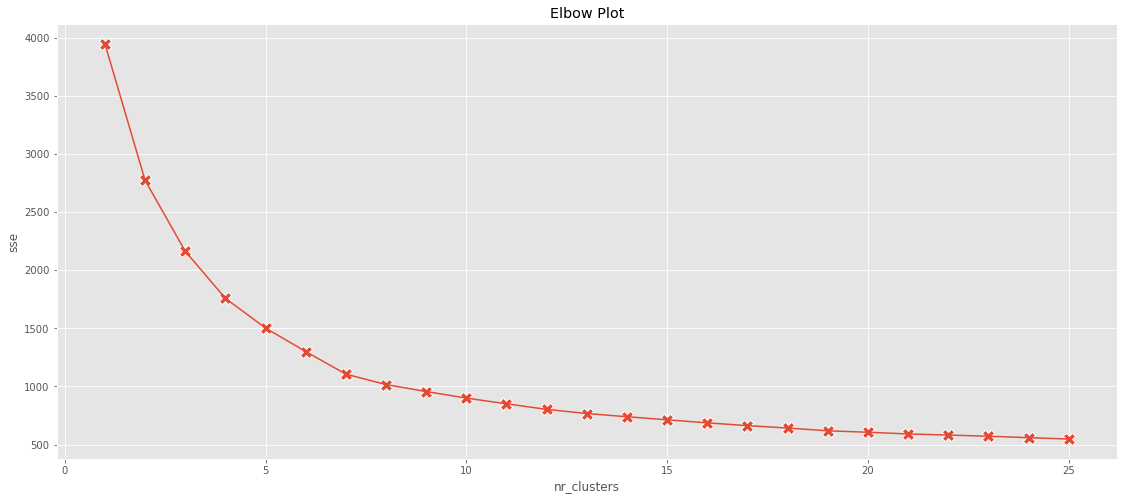

In [54]:
plt.figure(figsize = (19, 8))
sns.lineplot(data = df_sse, x = 'nr_clusters', y = 'sse')
sns.scatterplot(data = df_sse, x = 'nr_clusters', y = 'sse', marker = 'X', s = 150)
plt.title('Elbow Plot')
plt.show()

In [55]:
#Silhouette Score

#The silhouette score of 1 means that the clusters are very dense and nicely separated.

range_n_clusters = list (range(2,10))

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 123)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.29264591703353304)
For n_clusters = 3, silhouette score is 0.3156944646140422)
For n_clusters = 4, silhouette score is 0.3252413008685994)
For n_clusters = 5, silhouette score is 0.3433227863749527)
For n_clusters = 6, silhouette score is 0.35482199425356736)
For n_clusters = 7, silhouette score is 0.37520901558703396)
For n_clusters = 8, silhouette score is 0.3661601147225446)
For n_clusters = 9, silhouette score is 0.3737381247875282)


In [56]:
# Cluster

nr_clusters = 5

kmeans_model = KMeans(n_clusters = nr_clusters, random_state = 123)
kmeans_model.fit(df_scaled)
y_kmeans = kmeans_model.predict(df_scaled)

In [57]:
# Count observations per cluster
X_beforeNorm.groupby(y_kmeans).size()

0    1482
1    2768
2    1032
3    1995
4    1359
dtype: int64

In [58]:
print(kmeans_model.inertia_)

1502.3407711694738


In [59]:
df_clustered['cluster_kmeans'] = kmeans_model.labels_+1

In [60]:
centroids_kmeans = df_clustered.groupby('cluster_kmeans').mean()
centroids_kmeans.transpose()

cluster_kmeans,1,2,3,4,5
BALANCE,1589.846963,1524.904885,102.116798,2222.548801,1995.378115
BALANCE_FREQUENCY,0.849459,0.907123,0.788961,0.909052,0.980092
PURCHASES,623.781296,840.431734,877.779264,0.351013,3457.188779
ONEOFF_PURCHASES,623.808637,255.614678,212.248760,0.177158,2481.610625
INSTALLMENTS_PURCHASES,0.251741,585.339129,666.248508,0.217439,975.578153
CASH_ADVANCE,976.454009,751.589309,118.204835,2002.952832,691.918675
PURCHASES_FREQUENCY,0.239883,0.692829,0.719550,0.003731,0.927284
ONEOFF_PURCHASES_FREQUENCY,0.238432,0.094800,0.079109,0.001302,0.793397
PURCHASES_INSTALLMENTS_FREQUENCY,0.001934,0.625491,0.640245,0.002429,0.577873
CASH_ADVANCE_FREQUENCY,0.143917,0.103273,0.014903,0.274083,0.093473


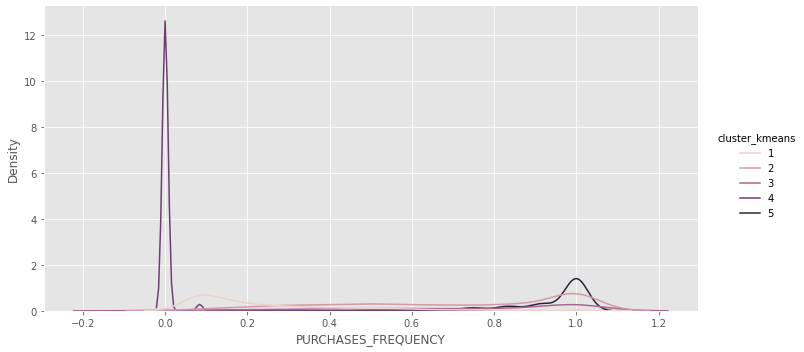

In [61]:
sns.displot(data=df_clustered, x="PURCHASES_FREQUENCY", hue="cluster_kmeans",aspect = 2, kind="kde")

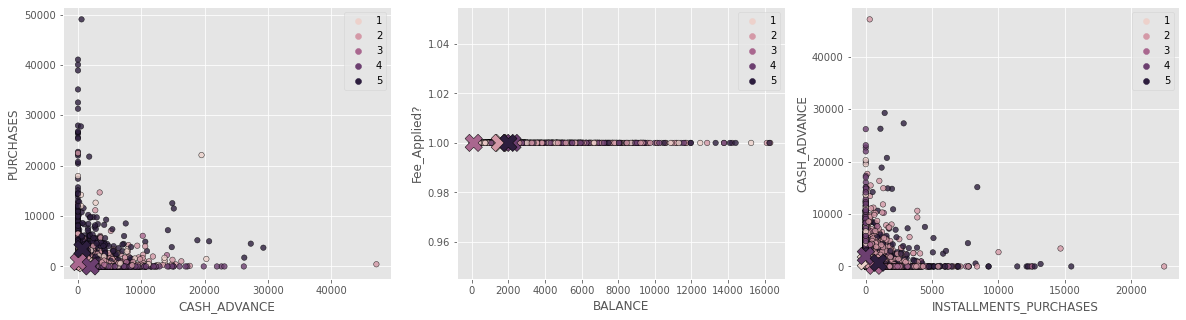

In [62]:
def plot_scatter_cluster(data, centroids, x, y, hue, ax):
    sns.scatterplot(data = data, x = x, y = y, hue = hue,s = 30, linewidth = .5,  edgecolor = 'black', alpha = .8,ax = ax)
    sns.scatterplot(data = centroids, x = x, y = y, hue = hue,s = 300, marker = 'X', linewidth = .5,  edgecolor = 'black',legend = False, ax = ax)
    ax.legend(loc = 'upper right')
    

fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 5))
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'CASH_ADVANCE', y = 'PURCHASES', hue = 'cluster_kmeans', ax = ax[0])
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'BALANCE', y = 'Fee_Applied?', hue = 'cluster_kmeans', ax = ax[1])
plot_scatter_cluster(data = df_clustered, centroids = centroids_kmeans, x = 'INSTALLMENTS_PURCHASES', y = 'CASH_ADVANCE', hue = 'cluster_kmeans', ax = ax[2])
plt.show()